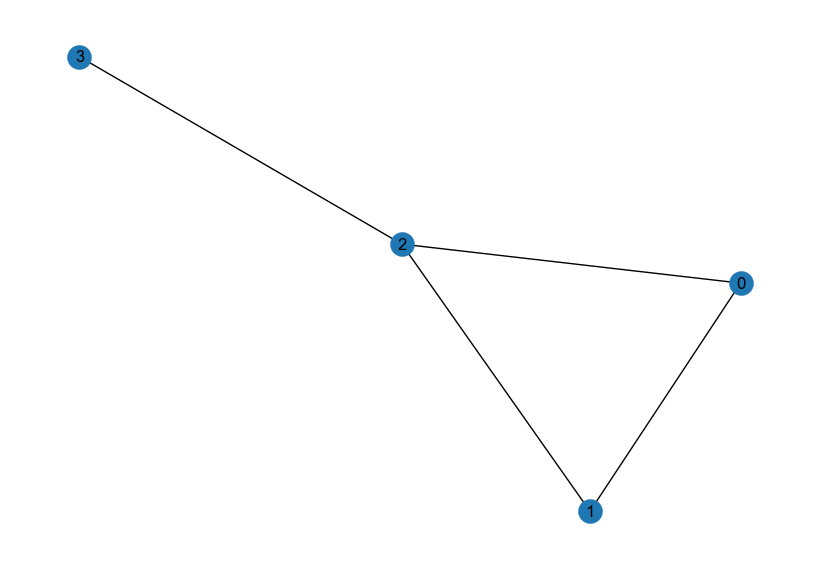

Cost Hamiltonian   (-0.25) [Z3]
+ (0.5) [Z0]
+ (0.5) [Z1]
+ (1.25) [Z2]
+ (0.75) [Z0 Z1]
+ (0.75) [Z0 Z2]
+ (0.75) [Z1 Z2]
+ (0.75) [Z2 Z3]
Mixer Hamiltonian   (-0.25) [Z3]
+ (0.5) [Z0]
+ (0.5) [Z1]
+ (1.25) [Z2]
+ (0.75) [Z0 Z1]
+ (0.75) [Z0 Z2]
+ (0.75) [Z1 Z2]
+ (0.75) [Z2 Z3]
Optimal Parameters
[[0.59806352 0.94198485]
 [0.52797281 0.85552845]]


/var/folders/7m/mqkfpjl97fv2sybjq8l1qv3r0000gn/T/ipykernel_40998/2403393826.py:61: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


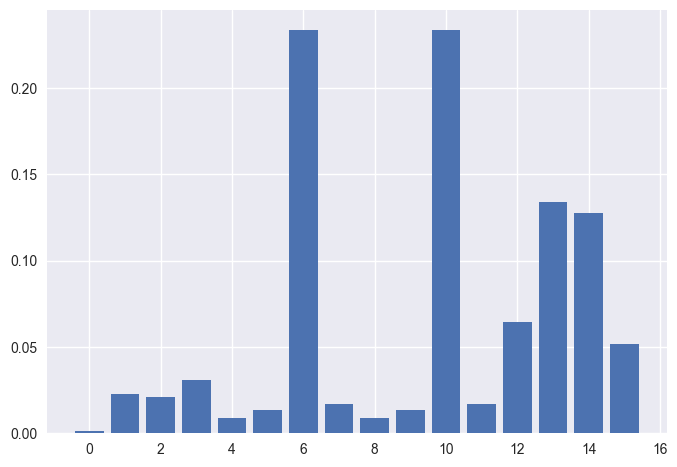

In [9]:
import pennylane as qml
from matplotlib import pyplot as plt
import networkx as nx

#try algorithm with pennylane
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
graph = nx.Graph(edges)

H = qml.Hamiltonian(
    [-0.25, 0.5, 0.5, 1.25, 0.75, 0.75, 0.75, 0.75],
    [qml.PauliZ(3), qml.PauliZ(0), qml.PauliZ(1), qml.PauliZ(2), 
     qml.PauliZ(0) @ qml.PauliZ(1),qml.PauliZ(0) @ qml.PauliZ(2),
     qml.PauliZ(1) @ qml.PauliZ(2),qml.PauliZ(2) @ qml.PauliZ(3)]
)

nx.draw(graph, with_labels=True)
plt.show()

cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=False)

print("Cost Hamiltonian", cost_h)
print("Mixer Hamiltonian", H)

def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)
    
#qubits
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])
    
dev = qml.device("qulacs.simulator", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

for i in range(steps):
    params = optimizer.step(cost_function, params)

print("Optimal Parameters")
print(params)

@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs)
plt.show()

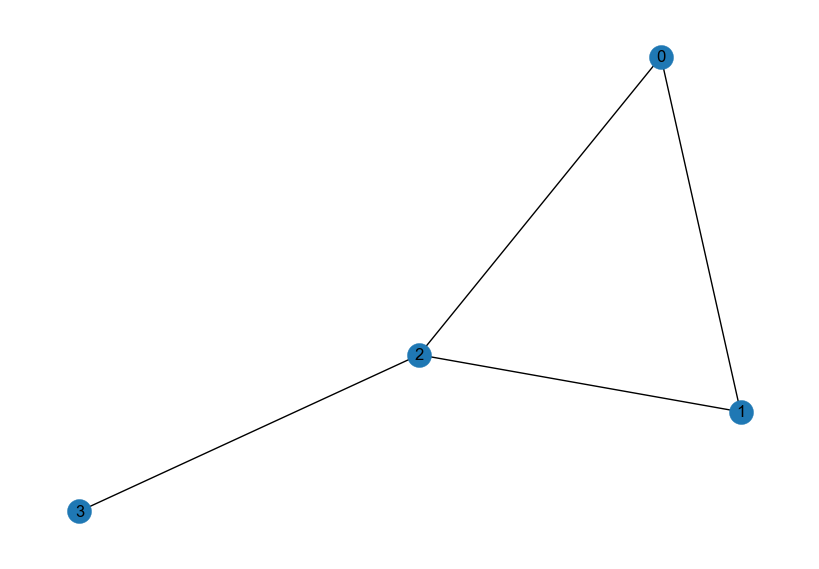

/var/folders/7m/mqkfpjl97fv2sybjq8l1qv3r0000gn/T/ipykernel_40998/105481416.py:64: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


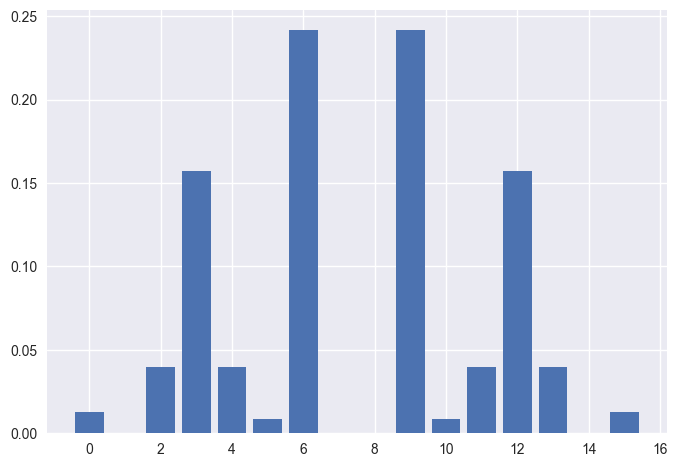

In [12]:
import pennylane as qml
from matplotlib import pyplot as plt
import networkx as nx

#start with zTA
#try algorithm with pennylane
edges = [(0, 1), (1, 2), (2, 0), (2, 3)]
graph = nx.Graph(edges)

H = qml.Hamiltonian(
    [-0.25, 0.5, 0.5, 1.25, 0.75, 0.75, 0.75, 0.75],
    [qml.PauliZ(3), qml.PauliZ(0), qml.PauliZ(1), qml.PauliZ(2), 
     qml.PauliZ(0) @ qml.PauliZ(1),qml.PauliZ(0) @ qml.PauliZ(2),
     qml.PauliZ(1) @ qml.PauliZ(2),qml.PauliZ(2) @ qml.PauliZ(3)]
)

nx.draw(graph, with_labels=True)
plt.show()

cost_h, mixer_h = qaoa.min_vertex_cover(graph, constrained=False)

A = [1, -1,
     0, 1]

cost_h = qml.Hamiltonian([2*1,2*-1,0,2*1],[qml.PauliZ(0) @ qml.PauliZ(2),qml.PauliZ(0) @ qml.PauliZ(3),qml.PauliZ(1) @ qml.PauliZ(2),qml.PauliZ(1) @ qml.PauliZ(3)])

def qaoa_layer(gamma, alpha):
    qaoa.cost_layer(gamma, cost_h)
    qaoa.mixer_layer(alpha, mixer_h)
    
wires = range(4)
depth = 2

def circuit(params, **kwargs):
    for w in wires:
        qml.Hadamard(wires=w)
    qml.layer(qaoa_layer, depth, params[0], params[1])
    
dev = qml.device("qulacs.simulator", wires=wires)

@qml.qnode(dev)
def cost_function(params):
    circuit(params)
    return qml.expval(cost_h)

optimizer = qml.GradientDescentOptimizer()
steps = 70
params = np.array([[0.5, 0.5], [0.5, 0.5]], requires_grad=True)

for i in range(steps):
    params = optimizer.step(cost_function, params)

#print("Optimal Parameters")
#print(params)

@qml.qnode(dev)
def probability_circuit(gamma, alpha):
    circuit([gamma, alpha])
    return qml.probs(wires=wires)


probs = probability_circuit(params[0], params[1])

plt.style.use("seaborn")
plt.bar(range(2 ** len(wires)), probs)
plt.show()


p=1
Objective after step     5:  4.0000000
Objective after step    10:  3.0000000
Objective after step    15:  4.0000000
Objective after step    20:  3.0000000
Objective after step    25:  3.0000000
Objective after step    30:  3.0000000
Optimized (gamma, beta) vectors:
[[-0.63789432]
 [ 0.42900392]]
Most frequently sampled bit string is: 1010

p=3
Objective after step     5:  2.0000000
Objective after step    10:  3.0000000
Objective after step    15:  3.0000000
Objective after step    20:  4.0000000
Objective after step    25:  4.0000000
Objective after step    30:  4.0000000
Optimized (gamma, beta) vectors:
[[-0.93028043  1.32309951  0.90567194]
 [ 1.13184689 -0.71498034  0.77089018]]
Most frequently sampled bit string is: 0101


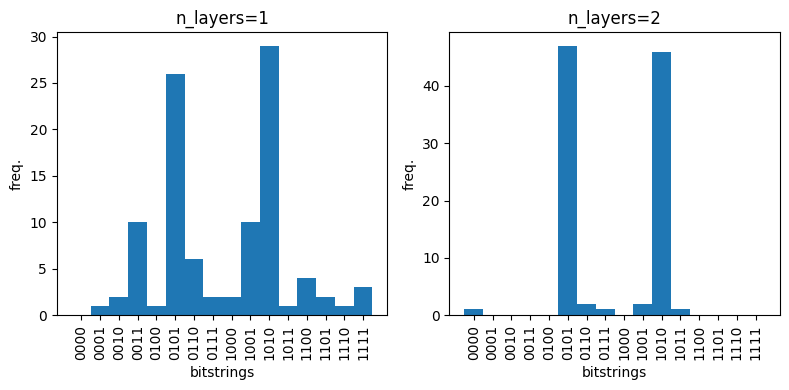

In [14]:
import pennylane as qml
from pennylane import numpy as np

#maxcut implementation with pennylane

np.random.seed(42)

n_wires = 4
graph = [(0, 1), (0, 3), (1, 2), (2, 3)]

# unitary operator U_B with parameter beta
def U_B(beta):
    for wire in range(n_wires):
        qml.RX(2 * beta, wires=wire)


# unitary operator U_C with parameter gamma
def U_C(gamma):
    for edge in graph:
        wire1 = edge[0]
        wire2 = edge[1]
        qml.CNOT(wires=[wire1, wire2])
        qml.RZ(gamma, wires=wire2)
        qml.CNOT(wires=[wire1, wire2])
        
def bitstring_to_int(bit_string_sample):
    bit_string = "".join(str(bs) for bs in bit_string_sample)
    return int(bit_string, base=2)

dev = qml.device("default.qubit", wires=n_wires, shots=1)

@qml.qnode(dev)
def circuit(gammas, betas, edge=None, n_layers=1):
    # apply Hadamards to get the n qubit |+> state
    for wire in range(n_wires):
        qml.Hadamard(wires=wire)
    # p instances of unitary operators
    for i in range(n_layers):
        U_C(gammas[i])
        U_B(betas[i])
    if edge is None:
        # measurement phase
        return qml.sample()
    # during the optimization phase we are evaluating a term
    # in the objective using expval
    H = qml.PauliZ(edge[0]) @ qml.PauliZ(edge[1])
    return qml.expval(H)

def qaoa_maxcut(n_layers=1):
    print("\np={:d}".format(n_layers))

    # initialize the parameters near zero
    init_params = 0.01 * np.random.rand(2, n_layers, requires_grad=True)

    # minimize the negative of the objective function
    def objective(params):
        gammas = params[0]
        betas = params[1]
        neg_obj = 0
        for edge in graph:
            # objective for the MaxCut problem
            neg_obj -= 0.5 * (1 - circuit(gammas, betas, edge=edge, n_layers=n_layers))
        return neg_obj

    # initialize optimizer: Adagrad works well empirically
    opt = qml.AdagradOptimizer(stepsize=0.5)

    # optimize parameters in objective
    params = init_params
    steps = 30
    for i in range(steps):
        params = opt.step(objective, params)
        if (i + 1) % 5 == 0:
            print("Objective after step {:5d}: {: .7f}".format(i + 1, -objective(params)))

    # sample measured bitstrings 100 times
    bit_strings = []
    n_samples = 100
    for i in range(0, n_samples):
        bit_strings.append(bitstring_to_int(circuit(params[0], params[1], edge=None, n_layers=n_layers)))

    # print optimal parameters and most frequently sampled bitstring
    counts = np.bincount(np.array(bit_strings))
    most_freq_bit_string = np.argmax(counts)
    print("Optimized (gamma, beta) vectors:\n{}".format(params[:, :n_layers]))
    print("Most frequently sampled bit string is: {:04b}".format(most_freq_bit_string))

    return -objective(params), bit_strings


# perform qaoa on our graph with p=1,2 and
# keep the bitstring sample lists
bitstrings1 = qaoa_maxcut(n_layers=1)[1]
bitstrings2 = qaoa_maxcut(n_layers=3)[1]

import matplotlib.pyplot as plt

xticks = range(0, 16)
xtick_labels = list(map(lambda x: format(x, "04b"), xticks))
bins = np.arange(0, 17) - 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("n_layers=1")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings1, bins=bins)
plt.subplot(1, 2, 2)
plt.title("n_layers=2")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings2, bins=bins)
plt.tight_layout()
plt.show()



p=1
Objective after step     5:  3.0000000
Objective after step    10: -3.0000000
Objective after step    15:  1.0000000
Objective after step    20: -1.0000000
Objective after step    25: -1.0000000
Objective after step    30: -1.0000000
Optimized (gamma, beta) vectors:
[[-1.12850962]
 [-0.34168182]]
Most frequently sampled bit string is: 1000

p=2
Objective after step     5: -1.0000000
Objective after step    10: -3.0000000
Objective after step    15: -3.0000000
Objective after step    20:  1.0000000
Objective after step    25:  1.0000000
Objective after step    30:  1.0000000
Optimized (gamma, beta) vectors:
[[0.46131828 1.22724288]
 [0.31254955 0.17060076]]
Most frequently sampled bit string is: 0000


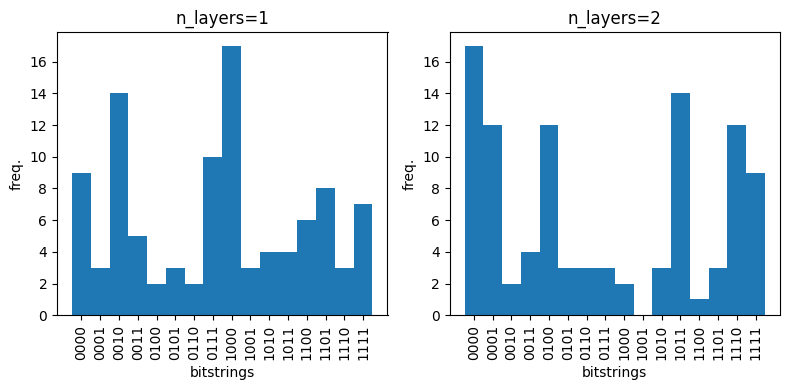

In [17]:
import pennylane as qml
from pennylane import numpy as np

#try for ron_calc implementation with pennylane

np.random.seed(42)

n_wires = 4
n = 2
A = np.array([[3,1],[1,-1]])
graph = [(0, 2), (0, 3), (1, 2), (1, 3)]
weights = [1,1,0,1]

# unitary operator U_B with parameter beta
def U_B(beta):
    for wire in range(n_wires):
        qml.RX(2 * beta, wires=wire)


# unitary operator U_C with parameter gamma
#def U_C(gamma):
#    for edge in graph:
#        wire1 = edge[0]
#        wire2 = edge[1]
#        qml.CNOT(wires=[wire1, wire2])
#        qml.RZ(gamma, wires=wire2)
#        qml.CNOT(wires=[wire1, wire2])
        
def U_C(gamma):
    for i in range(n):
            for j in range(n):
                qml.CNOT(wires=[i, j+n])
                qml.RZ(2*A[i,j].astype(int)*gamma, wires = j+n )
                qml.CNOT(wires=[i, j+n])
        
def bitstring_to_int(bit_string_sample):
    bit_string = "".join(str(bs) for bs in bit_string_sample)
    return int(bit_string, base=2)

dev = qml.device("default.qubit", wires=n_wires, shots=1)

@qml.qnode(dev)
def circuit(gammas, betas, edge=None, weight=1, n_layers=1):
    # apply Hadamards to get the n qubit |+> state
    for wire in range(n_wires):
        qml.Hadamard(wires=wire)
    # p instances of unitary operators
    for i in range(n_layers):
        U_C(gammas[i])
        U_B(betas[i])
    if edge is None:
        # measurement phase
        return qml.sample()
    # during the optimization phase we are evaluating a term
    # in the objective using expval
    H = weight*(qml.PauliZ(edge[0]) @ qml.PauliZ(edge[1])) # @ does matrix multiplication
    return qml.expval(H)

def qaoa_maxcut(n_layers=1):
    print("\np={:d}".format(n_layers))

    # initialize the parameters near zero
    init_params = 0.01 * np.random.rand(2, n_layers, requires_grad=True)

    # minimize the negative of the objective function
    def objective(params):
        gammas = params[0]
        betas = params[1]
        neg_obj = 0
        i=0
        for edge in graph:
            # objective for the MaxCut problem
            neg_obj -= circuit(gammas, betas, edge=edge, weight=weights[i], n_layers=n_layers)
            i += 1
        return neg_obj

    # initialize optimizer: Adagrad works well empirically
    opt = qml.AdagradOptimizer(stepsize=0.5)

    # optimize parameters in objective
    params = init_params
    steps = 30
    for i in range(steps):
        params = opt.step(objective, params)
        if (i + 1) % 5 == 0:
            print("Objective after step {:5d}: {: .7f}".format(i + 1, -objective(params)))

    # sample measured bitstrings 100 times
    bit_strings = []
    n_samples = 100
    for i in range(0, n_samples):
        bit_strings.append(bitstring_to_int(circuit(params[0], params[1], edge=None, n_layers=n_layers)))

    # print optimal parameters and most frequently sampled bitstring
    counts = np.bincount(np.array(bit_strings))
    most_freq_bit_string = np.argmax(counts)
    print("Optimized (gamma, beta) vectors:\n{}".format(params[:, :n_layers]))
    print("Most frequently sampled bit string is: {:04b}".format(most_freq_bit_string))

    return -objective(params), bit_strings


# perform qaoa on our graph with p=1,2 and
# keep the bitstring sample lists
bitstrings1 = qaoa_maxcut(n_layers=1)[1]
bitstrings2 = qaoa_maxcut(n_layers=2)[1]

import matplotlib.pyplot as plt

xticks = range(0, 16)
xtick_labels = list(map(lambda x: format(x, "04b"), xticks))
bins = np.arange(0, 17) - 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("n_layers=1")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings1, bins=bins)
plt.subplot(1, 2, 2)
plt.title("n_layers=2")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings2, bins=bins)
plt.tight_layout()
plt.show()

